# Movielens Dataset Analysis

- This is a real-word based project is a part of [Simplilearn](https://www.simplilearn.com/?&utm_source=google&utm_medium=cpc&utm_term=simplilearn&utm_content=184567234548&utm_device=c&utm_campaign=Search-Brand-MiddleEast-ROW-adgroup-Brand-Phrase&mkwid=sZbd0Di7C|pcrid|184567234548|pkw|simplilearn|pmt|p|pdv|c|slid||pgrid|41407361275|ptaid|aud-286398213528:kwd-21251385377|&gclid=Cj0KCQiA4NTxBRDxARIsAHyp6gCX95uHQmhzPAQCyD2tWg7Ey9sm8HmmWUtsL8nsycOHxTYydOk9BKkaAiCfEALw_wcB) Data Science Bootcamp
-----------
The **GroupLens** Research Project is a research group in the Department of Computer Science and Engineering in the University of Minnesota. The researchers of this group are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. Here, they asked me to perform the analysis using the Exploratory Data Analysis technique. 
*The goal here is to apply what I've learnt fro the course, the accuracy and robustness of the model dosn't matter here.*

## Data Files Details:

### 1- RATINGS FILE DESCRIPTION

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

### 2- USERS FILE DESCRIPTION

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

### 3- MOVIES FILE DESCRIPTION

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

###### Import the required libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# OneVsRestClassifier to be able to use it for mullti class classifer 
from sklearn.multiclass import OneVsRestClassifier 
from matplotlib import style 
#required to display plot here 
%matplotlib inline 

In [3]:
#Import the datasets
movies_df = pd.read_csv('C:/Users/Rawan/Desktop/Movielens Case Study/movies.dat', sep='::', engine='python')
ratings_df = pd.read_csv('C:/Users/Rawan/Desktop/Movielens Case Study/ratings.dat', sep='::', engine='python')
users_df = pd.read_csv('C:/Users/Rawan/Desktop/Movielens Case Study/users.dat', sep='::', engine='python')

In [4]:
#Rename the columns of the three datasets 
ratings_df.columns=['UserID', 'MovieID','Rating','Timestamp']
movies_df.columns=['MovieID','Title','Genres']
users_df.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [6]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [7]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [8]:
print(movies_df.shape, ratings_df.shape, users_df.shape)

(3882, 3) (1000208, 4) (6039, 5)


The final master dataset will contain these coulmns (UserID,MovieID,Rating,Gender,Age,Occupation, Title)

In [9]:
#Merge ratings and users dataframes on the primary key (UserID) and drop the un-needed columns 
Master_Data =pd.merge(ratings_df,users_df, on=['UserID'])
Master_Data=Master_Data.drop(['Zip-code','Timestamp'],axis=1)
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation
0,2,1357,5,M,56,16
1,2,3068,4,M,56,16
2,2,1537,4,M,56,16
3,2,647,3,M,56,16
4,2,2194,4,M,56,16


In [10]:
# Merge Master_Data and movies dataframe on the primary key (MoviID)
Master_Data =pd.merge(Master_Data,movies_df, on=['MovieID'])
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
0,2,1357,5,M,56,16,Shine (1996),Drama|Romance
1,8,1357,4,M,25,12,Shine (1996),Drama|Romance
2,10,1357,5,F,35,1,Shine (1996),Drama|Romance
3,18,1357,5,F,18,3,Shine (1996),Drama|Romance
4,33,1357,4,M,45,3,Shine (1996),Drama|Romance


In [11]:
#Drop the un-needed columns
Master_Data=Master_Data.drop('Genres',axis=1)
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title
0,2,1357,5,M,56,16,Shine (1996)
1,8,1357,4,M,25,12,Shine (1996)
2,10,1357,5,F,35,1,Shine (1996)
3,18,1357,5,F,18,3,Shine (1996)
4,33,1357,4,M,45,3,Shine (1996)


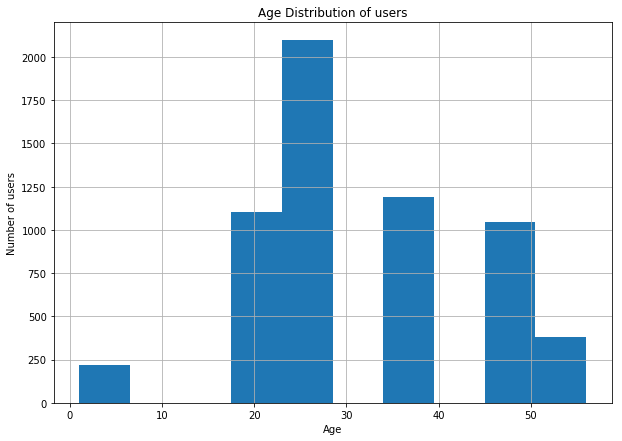

In [14]:
#User Age Distribution
plt.figure(figsize=(10,7))
users_df['Age'].hist(bins=10)
plt.title('Age Distribution of users')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

In [15]:
# User rating of “Toy Story 2 ” movie
Movie_Rate = Master_Data[['Title','Rating']]
 
Toystory_df = Movie_Rate.groupby('Title')
Toystory_df = Toystory_df.get_group('Toy Story 2 (1999)')
Toystory_df.head()

,Title,Rating
149516,Toy Story 2 (1999),3
149517,Toy Story 2 (1999),4
149518,Toy Story 2 (1999),4
149519,Toy Story 2 (1999),5
149520,Toy Story 2 (1999),4


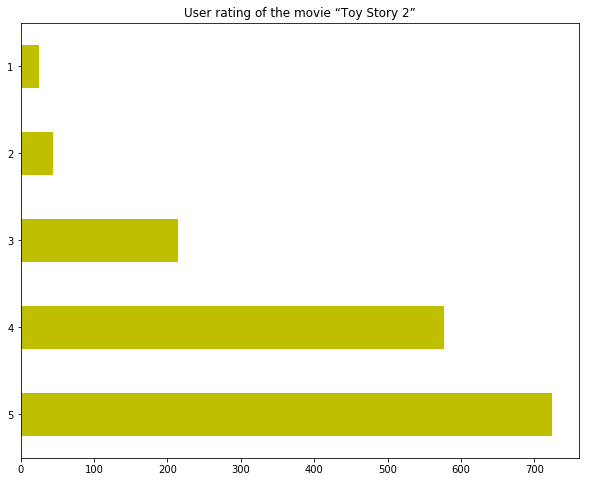

In [16]:
plt.figure(figsize=(10,8))
Toystory_df.Rating.value_counts().plot(kind='barh', color='y')
plt.title('User rating of the movie “Toy Story 2”')
plt.show()

In [17]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
User_Raiting = Master_Data[['UserID','Title','Rating']]
User_Raiting.head()

,UserID,Title,Rating
0,2,Shine (1996),5
1,8,Shine (1996),4
2,10,Shine (1996),5
3,18,Shine (1996),5
4,33,Shine (1996),4


In [18]:
User_Raiting = User_Raiting [User_Raiting.UserID == 2696]
User_Raiting 

,UserID,Title,Rating
163375,2696,Back to the Future (1985),2
179401,2696,E.T. the Extra-Terrestrial (1982),3
208520,2696,L.A. Confidential (1997),4
215552,2696,Lone Star (1996),5
239171,2696,JFK (1991),1
245858,2696,"Talented Mr. Ripley, The (1999)",4
354483,2696,Midnight in the Garden of Good and Evil (1997),4
360985,2696,Cop Land (1997),3
593088,2696,Palmetto (1998),4
598235,2696,"Perfect Murder, A (1998)",4


Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [19]:
movie_genres = movies_df[['Title','Genres']]
#if the index has multivalue we sprate it using split method  
genres_spilt = movie_genres.set_index('Title').Genres.str.split('|', expand=True).stack()
#Convert categorical variable into dummy/indicator variables by using get.dummies 
final_gnres = pd.get_dummies(genres_spilt, prefix='col').groupby(level=0).sum()
final_gnres

,col_Action,col_Adventure,col_Animation,col_Children's,col_Comedy,col_Crime,col_Documentary,col_Drama,col_Fantasy,col_Film-Noir,col_Horror,col_Musical,col_Mystery,col_Romance,col_Sci-Fi,col_Thriller,col_War,col_Western
Title,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
'Night Mother (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
"'burbs, The (1989)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1-900 (1994),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10 Things I Hate About You (1999),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
101 Dalmatians (1961),0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101 Dalmatians (1996),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
Master_Data_arranged = Master_Data[['UserID', 'Gender', 'Age', 'Occupation', 'MovieID','Title','Rating']]
Master_Data_arranged.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating
0,2,M,56,16,1357,Shine (1996),5
1,8,M,25,12,1357,Shine (1996),4
2,10,F,35,1,1357,Shine (1996),5
3,18,F,18,3,1357,Shine (1996),5
4,33,M,45,3,1357,Shine (1996),4


In [21]:
Master_Data_arranged.shape

(998080, 7)

In [22]:
Master_Data_arranged.describe()

,UserID,Age,Occupation,MovieID,Rating
count,998080.000000,998080.000000,998080.000000,998080.000000,998080.000000
mean,3024.608884,29.744052,8.035970,1869.434325,3.580357
std,1728.273821,11.749987,6.531805,1093.878797,1.117300
min,2.000000,1.000000,0.000000,2.000000,1.000000
25%,1506.000000,25.000000,2.000000,1034.000000,3.000000
50%,3070.000000,25.000000,7.000000,1845.000000,4.000000
75%,4476.000000,35.000000,14.000000,2772.000000,4.000000
max,6040.000000,56.000000,20.000000,3952.000000,5.000000


In [23]:
#change the value of the gender to (0: Female and 1:Male)
lb_make = LabelEncoder()
Master_Data_arranged["Gender"] = lb_make.fit_transform(Master_Data_arranged["Gender"])
Master_Data_arranged.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating
0,2,1,56,16,1357,Shine (1996),5
1,8,1,25,12,1357,Shine (1996),4
2,10,0,35,1,1357,Shine (1996),5
3,18,0,18,3,1357,Shine (1996),5
4,33,1,45,3,1357,Shine (1996),4


Drop UserID and Title, it won't help in the classification 

In [25]:
Master_Data_arranged=Master_Data_arranged.drop(['UserID','Title'],axis=1)
Master_Data_arranged.head()

,Gender,Age,Occupation,MovieID,Rating
0,1,56,16,1357,5
1,1,25,12,1357,4
2,0,35,1,1357,5
3,0,18,3,1357,5
4,1,45,3,1357,4


Develop an appropriate model to predict the movie ratings

In [26]:
#select only 5000 of the dataset , it will be easy to spil it in the half 
features_df = Master_Data_arranged.sample(n=5000, random_state=0)
features_df.head()

,Gender,Age,Occupation,MovieID,Rating
132227,0,25,1,1641,4
902997,1,50,0,1228,4
550364,1,25,18,2706,3
359887,0,50,1,111,5
908225,1,35,7,1951,4


In [27]:
#split the class "target" and the rest of the dataset 
x_features = features_df.drop('Rating', 1)  
y_target= features_df['Rating']

In [28]:
# spilt the dataset into training set and testing set and let the test dataset to be 0.20
x_train , x_test , y_train , y_test = train_test_split(x_features,y_target,test_size = 0.20,random_state =0)

In [29]:
print (x_train.shape , x_test.shape, y_train.shape, y_test.shape)

(4000, 4) (1000, 4) (4000,) (1000,)


Two models will be applied : logistic regression and KNN 

**Model 1 - Logistic Regression**

In [31]:
#estimator
LogReg = OneVsRestClassifier(LogisticRegression(solver='lbfgs',max_iter= 4000,multi_class='multinomial'))
LogReg.fit(x_train, y_train)
y_prediction= LogReg.predict(x_test)

In [33]:
print ('MSE value is %.2f' %np.mean((LogReg.predict(x_test)-y_test)**2))

MSE value is 1.42


In [34]:
#variance value 
print ("vraiance score is %.2f" %LogReg.score(x_test,y_test) )

vraiance score is 0.33


**Mode 2 KNN**

In [35]:
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_prediction= knn.predict(x_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

Accuracy: 0.278
